In [1]:
from itertools import chain

import anndata as ad
import networkx as nx
import scanpy as sc
import scglue
import numpy as np
import pandas as pd
from matplotlib import rcParams

In [2]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

## Read the data

In [3]:
import os

# Define the directory path
data_dir = '/dss/dsshome1/09/di93qow/glue'
# Define the file name
file_name_1 = 'GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad'
# Combine the directory path and file name to create the complete file path
file_path_1 = os.path.join(data_dir, file_name_1)

AnnData object with n_obs × n_vars = 69249 × 129921
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [ ]:
multiom = ad.read_h5ad(file_path_1)
multiom

In [4]:
multiom = multiom[multiom.obs['Site'].isin(['site1', 'site2'])].copy() #select site1 and site2 as a reference
multiom

AnnData object with n_obs × n_vars = 32469 × 129921
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [5]:
multiom.var

,feature_types,gene_id
AL627309.5,GEX,ENSG00000241860
LINC01409,GEX,ENSG00000237491
LINC01128,GEX,ENSG00000228794
NOC2L,GEX,ENSG00000188976
KLHL17,GEX,ENSG00000187961
...,...,...
GL000219.1-90062-90937,ATAC,NaN
GL000219.1-99257-100160,ATAC,NaN
KI270726.1-27152-28034,ATAC,NaN
KI270713.1-21434-22336,ATAC,NaN


In [6]:
atac_multiom = multiom[:, multiom.var['feature_types'] == 'ATAC'].copy()

In [7]:
atac_multiom = multiom[:, multiom.var['feature_types'] == 'ATAC'].copy()
rna_multiom = multiom[:, multiom.var['feature_types'] == 'GEX'].copy()
rna_multiom, atac_multiom

(AnnData object with n_obs × n_vars = 32469 × 13431
     obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
     var: 'feature_types', 'gene_id'
     uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
     obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
     layers: 'counts',
 AnnData object with n_obs × n_vars = 32469 × 116490
     obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist

In [8]:
assert np.sum(rna_multiom.obs_names != atac_multiom.obs_names) == 0 #we make sure that cells are the same in multiome data

In [ ]:
# Define the directory path
data_dir = '/dss/dsshome1/09/di93qow/glue'
# Define the file name
file_name_2 = 'GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad'
# Combine the directory path and file name to create the complete file path
file_path_2 = os.path.join(data_dir, file_name_2)

In [9]:
cite = ad.read_h5ad(file_path_2)
cite

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 90261 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [10]:
cite = cite[cite.obs['Site'].isin(['site1', 'site2'])].copy() #select site1 and site2 as a reference
cite

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 41482 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [11]:
adt_cite = cite[:, cite.var['feature_types'] == 'ADT'].copy()
rna_cite = cite[:, cite.var['feature_types'] == 'GEX'].copy()
adt_cite, rna_cite

(AnnData object with n_obs × n_vars = 41482 × 134
     obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
     var: 'feature_types', 'gene_id'
     uns: 'dataset_id', 'genome', 'organism'
     obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
     layers: 'counts',
 AnnData object with n_obs × n_vars = 41482 × 13953
     obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot',

In [12]:
assert np.sum(rna_cite.obs_names != adt_cite.obs_names) == 0 #we make sure that cells are the same in cite data

## Preprocess RNA-seq

In [16]:
rna = rna_multiom.concatenate(rna_cite, batch_key='concat_key', index_unique=None)
rna

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


AnnData object with n_obs × n_vars = 73951 × 12059
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'new_batch', 'GEX_n_genes_by_counts', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'ADT_pseudotime_order', 'is_train', 'concat_key'
    var: 'feature_types', 'gene_id-0', 'gene_id-1'
    obsm: 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [17]:
rna.X = rna.layers["counts"].copy()

In [18]:
sc.pp.highly_variable_genes(rna, n_top_genes=4000, flavor="seurat_v3")

In [19]:
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)
sc.pp.scale(rna)
sc.tl.pca(rna, n_comps=100, svd_solver="auto")

In [20]:
sc.pp.neighbors(rna, metric="cosine")
sc.tl.umap(rna)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versi

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


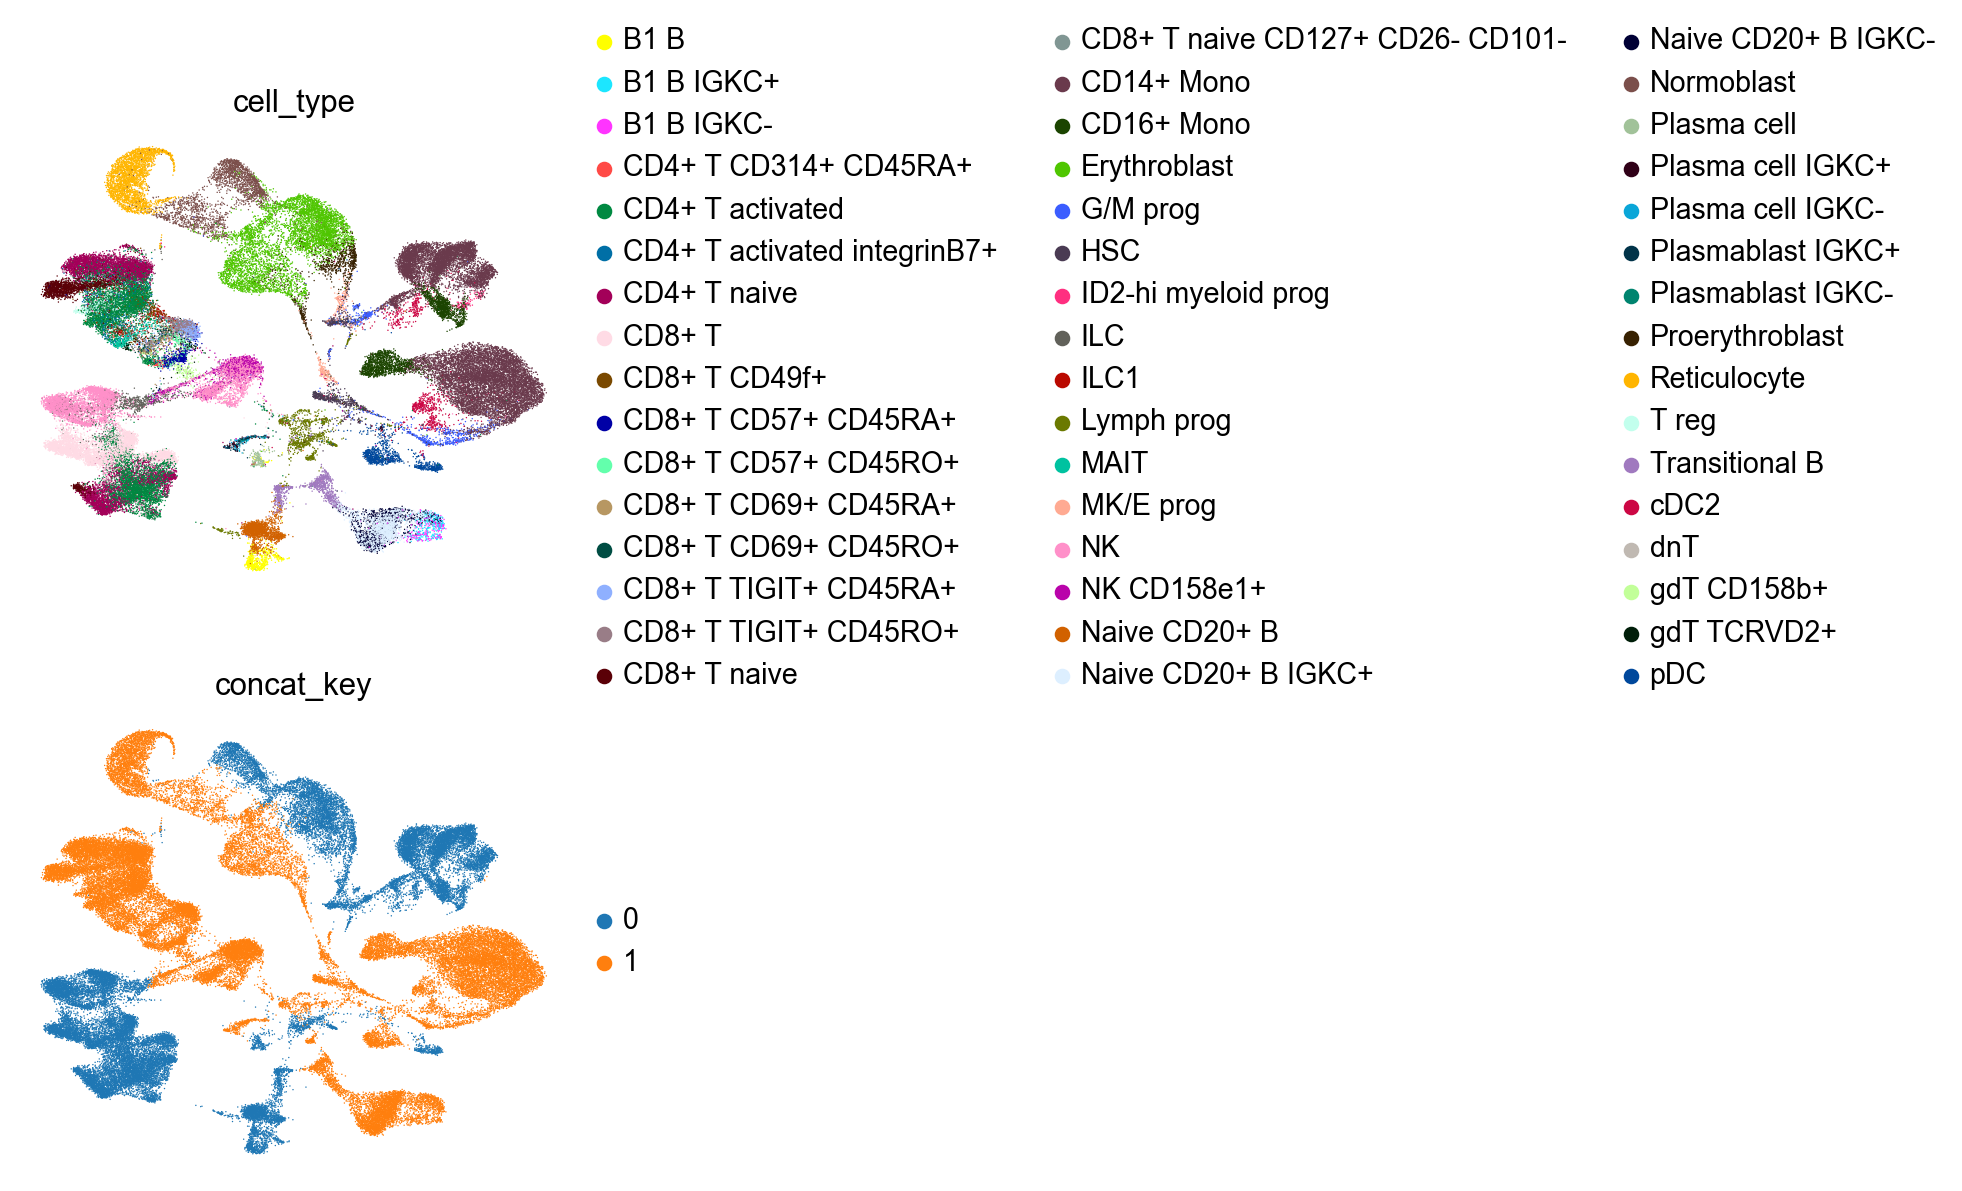

In [ ]:
#sc.pl.umap(rna, color=["cell_type", "concat_key"], ncols=1, frameon=False)

In [22]:
rna.X = rna.layers["counts"].copy()

## Preprocess ATAC

In [23]:
atac_multiom.X = atac_multiom.layers['counts'].copy()

In [24]:
atac_multiom.layers['tf-idf'] = atac_multiom.X.copy()

In [25]:
sc.pp.normalize_total(atac_multiom, target_sum=1e4)
sc.pp.log1p(atac_multiom)

In [26]:
sc.pp.highly_variable_genes(atac_multiom, n_top_genes=20000, batch_key='batch') #subset to top 20000 peaks

In [27]:
scglue.data.lsi(atac_multiom, n_components=100, n_iter=15) #The LSI embedding will be used in stage 2 as the first encoder transformation to reduce model size.

In [28]:
sc.pp.neighbors(atac_multiom, use_rep="X_lsi", metric="cosine")
sc.tl.umap(atac_multiom)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


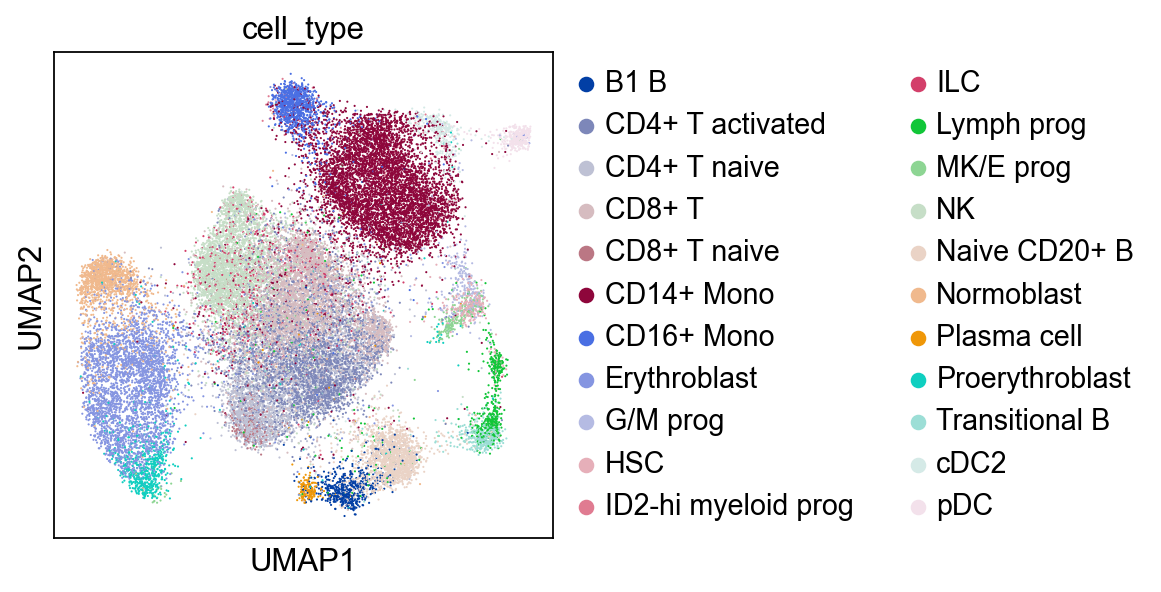

In [ ]:
#sc.pl.umap(atac_multiom, color="cell_type")

## Preprocess ADT

In [30]:
np.max(adt_cite.X)

7.7640185

In [31]:
sc.tl.pca(adt_cite, n_comps=100, svd_solver="auto")

In [32]:
sc.pp.neighbors(adt_cite, metric="cosine")
sc.tl.umap(adt_cite)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


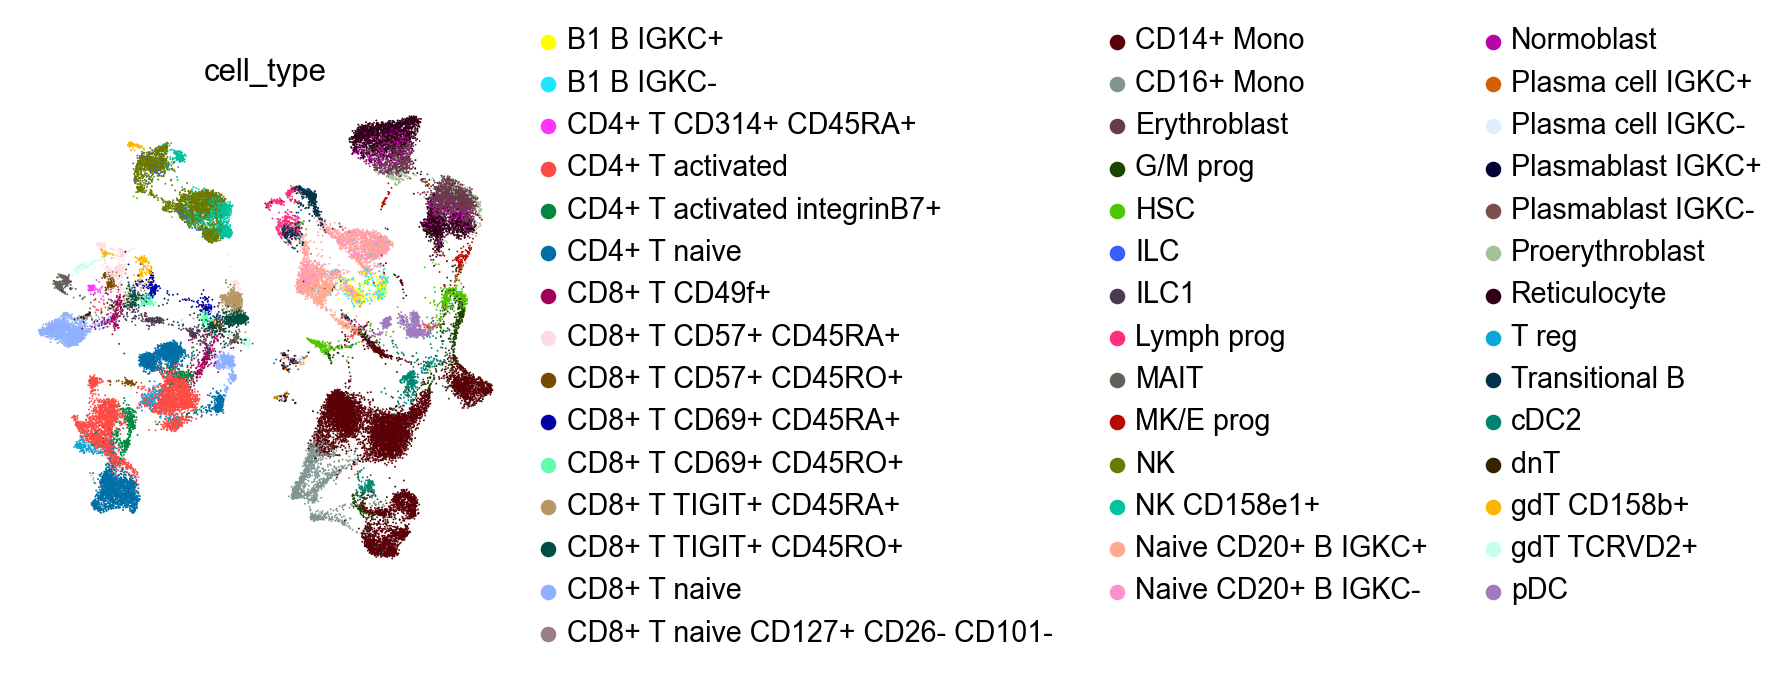

In [ ]:
#sc.pl.umap(adt_cite, color="cell_type", frameon=False)

## Graph construction

### Add RNA-ATAC edges, RNA nodes and ATAC nodes

In [ ]:
import os

# Define the directory path
data_dir = '/dss/dsshome1/09/di93qow/glue'
# Define the file name
file_name_3 = 'gencode.v41.chr_patch_hapl_scaff.annotation.gtf'
# Combine the directory path and file name to create the complete file path
file_path_3 = os.path.join(data_dir, file_name_3)

In [35]:
scglue.data.get_gene_annotation(
    rna, gtf = file_path_3,
    gtf_by="gene_name"
)
rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]].head()

,chrom,chromStart,chromEnd
AL627309.5,NaN,NaN,NaN
LINC01409,chr1,778746.0,810065.0
LINC01128,chr1,825137.0,859446.0
NOC2L,chr1,944202.0,959309.0
KLHL17,chr1,960583.0,965719.0


In [36]:
rna = rna[:, ~rna.var["chrom"].isna()]
rna

View of AnnData object with n_obs × n_vars = 73951 × 11309
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'new_batch', 'GEX_n_genes_by_counts', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'ADT_pseudotime_order', 'is_train', 'concat_key'
    var: 'feature_types', 'gene_id-0', 'gene_id-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 

In [37]:
atac_multiom.var_names[:5]

Index(['chr1-9776-10668', 'chr1-180726-181005', 'chr1-181117-181803',
       'chr1-191133-192055', 'chr1-267562-268456'],
      dtype='object')

In [38]:
split = atac_multiom.var_names.str.split(r"[:-]")
atac_multiom.var["chrom"] = split.map(lambda x: x[0])
atac_multiom.var["chromStart"] = split.map(lambda x: x[1]).astype(int)
atac_multiom.var["chromEnd"] = split.map(lambda x: x[2]).astype(int)
atac_multiom.var.head()

,feature_types,gene_id,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection,chrom,chromStart,chromEnd
chr1-9776-10668,ATAC,NaN,False,0.031062,1.817257,0.674005,1,False,chr1,9776,10668
chr1-180726-181005,ATAC,NaN,True,0.026252,2.177327,1.565104,4,False,chr1,180726,181005
chr1-181117-181803,ATAC,NaN,False,0.052126,1.573240,0.250831,1,False,chr1,181117,181803
chr1-191133-192055,ATAC,NaN,True,0.017650,1.710112,0.624653,2,False,chr1,191133,192055
chr1-267562-268456,ATAC,NaN,False,0.012426,1.306993,-0.311734,0,False,chr1,267562,268456


In [39]:
guidance = scglue.genomics.rna_anchored_guidance_graph(rna, atac_multiom)
guidance

window_graph:   0%|          | 0/11309 [00:00<?, ?it/s]

In [40]:
scglue.graph.check_graph(guidance, [rna, atac_multiom])

[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] check_graph: All checks passed!


In [41]:
guidance.number_of_nodes(), guidance.number_of_edges()

(127799, 259729)

In [42]:
for _, e in zip(range(5), guidance.edges):
    print(f"{e}: {guidance.edges[e]}")

('LINC01409', 'chr1-778276-779191', 0): {'dist': 0, 'weight': 1.0, 'sign': 1, 'type': 'fwd'}
('LINC01409', 'LINC01409', 0): {'weight': 1.0, 'sign': 1, 'type': 'loop'}
('chr1-778276-779191', 'LINC01409', 0): {'dist': 0, 'weight': 1.0, 'sign': 1, 'type': 'rev'}
('chr1-778276-779191', 'chr1-778276-779191', 0): {'weight': 1.0, 'sign': 1, 'type': 'loop'}
('LINC01128', 'chr1-822804-823597', 0): {'dist': 0, 'weight': 1.0, 'sign': 1, 'type': 'fwd'}


### Add RNA-ADT edges and ADT nodes

In [43]:
adt_cite.var_names

Index(['CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40',
       'CD154', 'CD52',
       ...
       'CD94', 'CD162', 'CD85j', 'CD23', 'CD328', 'HLA-E', 'CD82', 'CD101',
       'CD88', 'CD224'],
      dtype='object', length=134)

In [44]:
rna.var_names

Index(['LINC01409', 'LINC01128', 'NOC2L', 'KLHL17', 'ISG15', 'C1orf159',
       'SDF4', 'B3GALT6', 'UBE2J2', 'ACAP3',
       ...
       'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', length=11309)

In [45]:
len(set(rna.var_names).intersection(set(adt_cite.var_names)))

35

In [46]:
graph = guidance.copy()

In [47]:
p = np.array(adt_cite.var_names)
r = np.array(rna.var_names)
# mask entries are set to 1 where protein name is the same as gene name 
mask = np.repeat(p.reshape(-1, 1), r.shape[0], axis=1) == r
mask = np.array(mask)

In [48]:
prot_vars = [v + '_prot' for v in adt_cite.var_names]
adt_cite.var_names = prot_vars

In [49]:
rna_vars = rna.var_names

In [50]:
adj = pd.DataFrame(mask, index=prot_vars, columns=rna_vars)
diag_edges = adj[adj > 0].stack().index.tolist()
diag_edges_to_add = [(n1, n2, {'weight': 1., 'sign': 1}) for n1, n2 in diag_edges]
diag_edges_to_add.extend([(n2, n1, {'weight': 1., 'sign': 1}) for n1, n2 in diag_edges])
# self_loop_rna = [(g, g, {'weight': 1., 'sign': 1}) for g in rna_vars]
self_loop_prot = [(g, g, {'weight': 1., 'sign': 1}) for g in prot_vars]

In [51]:
graph.add_nodes_from(prot_vars)
graph.add_edges_from(diag_edges_to_add)
graph.add_edges_from(self_loop_prot)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [52]:
graph.number_of_nodes(), graph.number_of_edges()

(127933, 259933)

In [53]:
#paired configurations
scglue.models.configure_dataset(
    rna, 
    "NB", 
    use_highly_variable=True,
    use_layer="counts", 
    use_rep="X_pca",
    use_batch="Samplename",
    use_obs_names=True, #Whether to use obs_names to mark paired cells across different datasets
    
)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scglue/models/__init__.py:124: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[config.ANNDATA_KEY] = data_config


In [54]:
#paired configurations
scglue.models.configure_dataset(
    atac_multiom, 
    "NB", 
    use_highly_variable=True,
    use_layer="counts", 
    use_rep="X_lsi",
    use_batch="Samplename",
    use_obs_names=True, #Whether to use obs_names to mark paired cells across different datasets
)

In [55]:
#paired configurations
scglue.models.configure_dataset(
    adt_cite, 
    "Normal", 
    use_highly_variable=False,
    use_rep="X_pca",
    use_batch="Samplename",
    use_obs_names=True, #Whether to use obs_names to mark paired cells across different datasets  
)

In [56]:
atac_multiom.obs["Samplename"] #check that Samplename containes the infomation about different modalities

TAGTTGTCACCCTCAC-1-s1d1    site1_donor1_multiome
CTATGGCCATAACGGG-1-s1d1    site1_donor1_multiome
CCGCACACAGGTTAAA-1-s1d1    site1_donor1_multiome
TCATTTGGTAATGGAA-1-s1d1    site1_donor1_multiome
ACCACATAGGTGTCCA-1-s1d1    site1_donor1_multiome
                                   ...          
TCGTGCTTCGTTACAA-6-s2d5    site2_donor5_multiome
TGTGGAGCAGGTTAAA-6-s2d5    site2_donor5_multiome
TTCGCAACATGATTGT-6-s2d5    site2_donor5_multiome
AAGTAGCCATGTGGGA-6-s2d5    site2_donor5_multiome
CTCACTCAGCCTTAAA-6-s2d5    site2_donor5_multiome
Name: Samplename, Length: 32469, dtype: category
Categories (6, object): ['site1_donor1_multiome', 'site1_donor2_multiome', 'site1_donor3_multiome', 'site2_donor1_multiome', 'site2_donor4_multiome', 'site2_donor5_multiome']

In [57]:
scglue.graph.check_graph(graph, [rna, atac_multiom, adt_cite])

[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] check_graph: All checks passed!


In [58]:
graph_hvf = graph.subgraph(chain(
    rna.var.query("highly_variable").index,
    atac_multiom.var.query("highly_variable").index,
    adt_cite.var.index
)).copy()

In [ ]:
#paired training
glue_trimodal = scglue.models.fit_SCGLUE(
    {"rna": rna, "atac": atac_multiom, "adt": adt_cite}, graph_hvf,
    model=scglue.models.PairedSCGLUEModel,
    fit_kws={"directory": "glue"}
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
[INFO] autodevice: Using CPU as computation device.
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] PairedSCGLUEModel: Setting `graph_batch_size` = 29695
[INFO] PairedSCGLUEModel: Setting `max_epochs` = 48
[INFO] PairedSCGLUEModel: Setting `patience` = 4
[INFO] PairedSCGLUEModel: Setting `reduce_lr_patience` = 2
[INFO] PairedSCGLUETrainer: Using training directory: "glue/pretrain"


In [ ]:
rna.obsm["X_glue"] = glue_trimodal.encode_data("rna", rna)
atac_multiom.obsm["X_glue"] = glue_trimodal.encode_data("atac", atac_multiom)
adt_cite.obsm["X_glue"] = glue_trimodal.encode_data("adt", adt_cite)

In [ ]:
rna.obs['assay'] = 'rna'
atac_multiom.obs['assay'] = 'atac'
adt_cite.obs['assay'] = 'adt'

In [ ]:
combined = ad.concat([rna, atac_multiom, adt_cite])

In [ ]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)

In [ ]:
combined

In [ ]:
#sc.pl.umap(combined, color=["cell_type", "Samplename", "assay"], ncols=1, frameon=False)

In [ ]:
#save AnnData object
combined.write('glue_trimodal_paired_integrated.h5ad')

In [2]:
import anndata as ad
paired = ad.read_h5ad('glue_trimodal_paired_integrated.h5ad')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
paired

AnnData object with n_obs × n_vars = 147902 × 0
    obs: 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'cell_type', 'batch', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'new_batch', 'balancing_weight', 'assay'
    uns: 'neighbors', 'umap'
    obsm: 'GEX_X_pca', 'GEX_X_umap', 'X_glue', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
import scanpy as sc
sc.pp.neighbors(paired, use_rep="X_glue", metric="cosine")
sc.tl.umap(paired)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versi

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


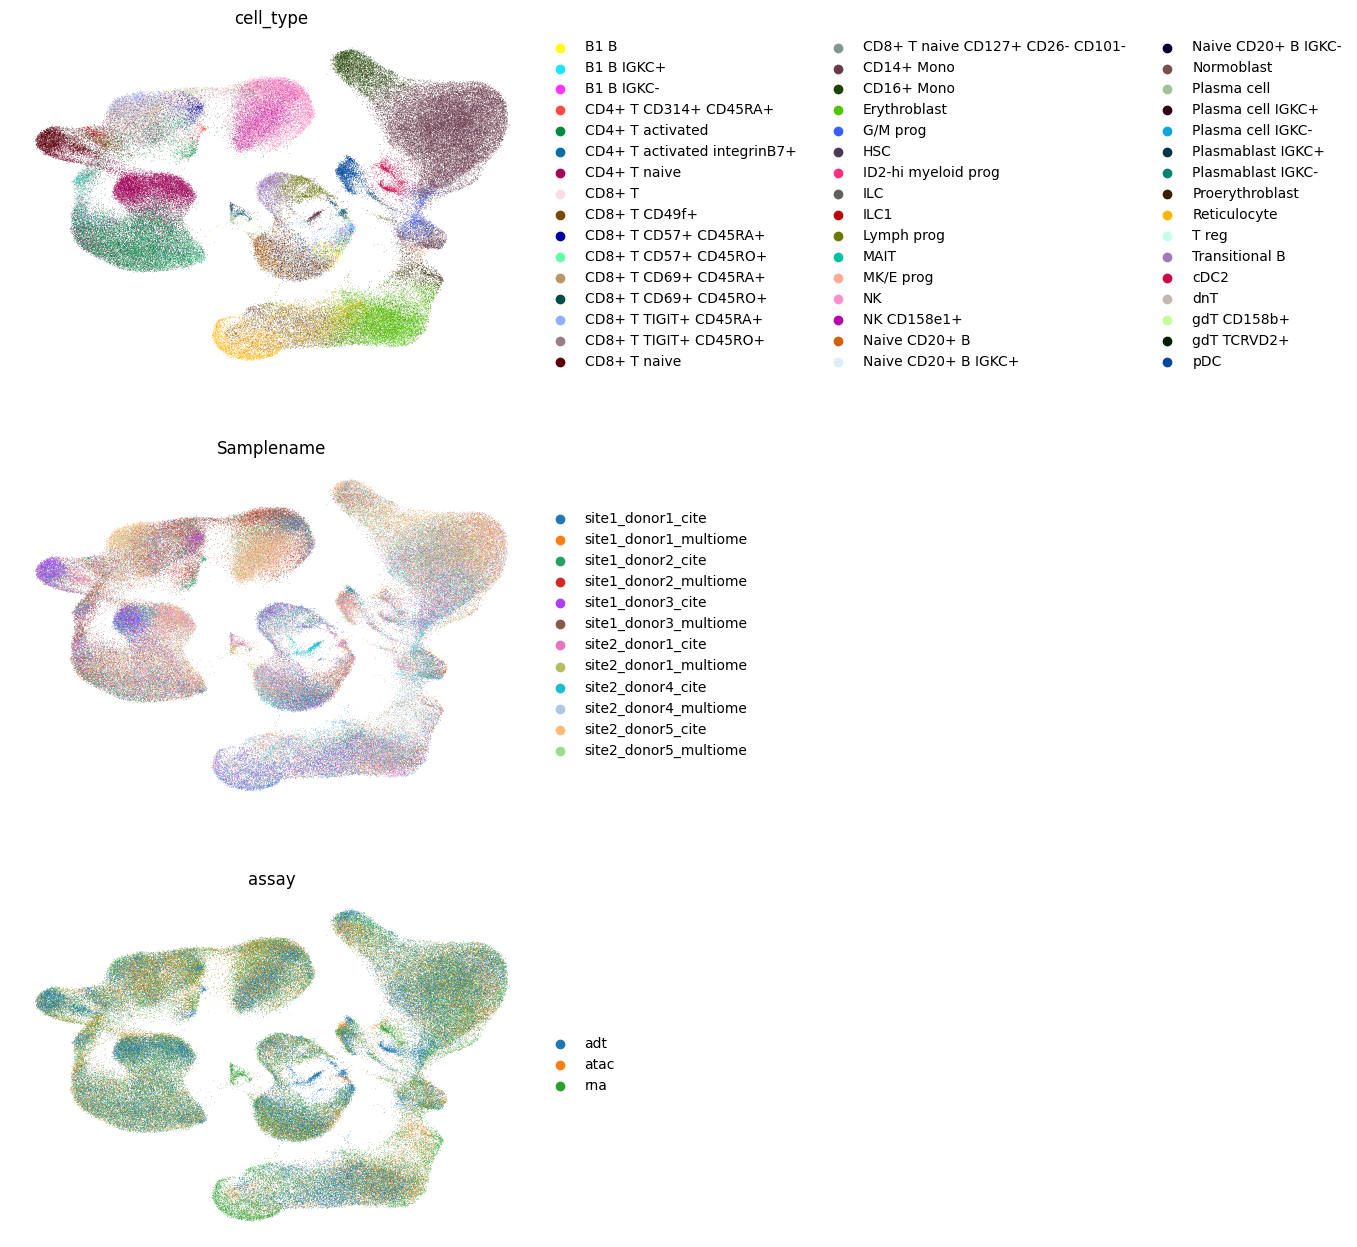

In [ ]:
sc.pl.umap(paired, color=["cell_type", "Samplename", "assay"], ncols=1, frameon=False)